<font size="1"> *This notebook is best viewed in jupyter lab/notebook. You may also choose to use Google Colab but some parts of the images/colouring will not be rendered properly.</font> 

<div class="alert alert-block alert-warning">

# <p style="text-align: center;">Lab 2 (Weeks 3,4): Model training with Linear Regression and Logistic Regression</p>

<img src="https://upload.wikimedia.org/wikipedia/commons/c/c3/Python-logo-notext.svg" width="200" height="200" />

<!-- ![linear-vs-logistic-regression--medium](https://miro.medium.com/max/1400/1*dm6ZaX5fuSmuVvM4Ds-vcg.jpeg) -->

Welcome to your second lab!  Labs classes in this unit will run as a help desk and they are not mandatory to attend.

This notebooks provided contain all the code and comments that you need to submit. Feel free to add in your own markdown for additional comments.

Here are the instructions to complete this lab:

- The marks of the lab is based on the Moodle '**Lab 2 Quiz**' attempt.
- You need to submit the Jupyter Notebook (.ipynb file) to Moodle submission box '**Lab 2 Submission**'.
- We do not directly mark your notebook, but it is required to show your work out for the questions.
- If the notebook is not submitted, we consider the lab is not completed and no marks will be given for the quiz questions.
- In some sections, we ask for screenshots of your code and plot. Please make sure to add your name and student ID to the title of the plot (which means it will also show in your code).
- Please use the **Drop Box** in the quiz to upload images.
- We do not require you to complete every single section in the notebook. However, for the parts that we ask for a screenshot of your code and outputs, we require those parts to be completed.

This Lab has three tasks. The first two tasks test your basic knowledge regarding the linear and logistic regression and their applcations. In the last task, you will analyse the results.
- <b>Task 1:</b> Simple linear regression
- <b>Task 2:</b> Logistic regression and gradient descent
- <b>Task 3:</b> Analysing convergence and accuracy
    
Each sub task will contain code to complete, and/or a worded question.

Feel free to add in your own markdown for additional comments, and also directly comment your code.

Good luck with the Lab!

<b>Enter you credentials below</b>

- <b>Student Name:</b> Campbell Gregor
- <b>Student ID:</b> 33110018

<div class="alert alert-block alert-danger">

## Table of Contents

* [Task 1: Simple linear regression](#simple-linear-regression)    
    * [1.1 Simple linear regression formulation](#lr-formulation)
    * [1.2 Test and visualise the linear regression](#test-lr)
    
    
* [Task 2: Logistic Regression and Gradient Descent](#logistic-gd)
    * [2.1 The sigmoid function](#sigmoid)
    * [2.2 Predicting class probabilities via logistic regression](#predict)
    * [2.3 Training a model via Gradient Descent](#train)
    * [2.4 Evaluating the trained model](#evaluate)
    

* [Task 3: Analysing convergence and accuracy](#analyse-convergence-and-accuracy)

In [79]:
## Libraries, you do not need to import any additional libraries for this lab

import numpy as np ## Numpy is the fundamental building block of understanding tensor (matrices) within Python
import matplotlib.pyplot as plt ## Matplotlib.pyplot is the graphing library that we will be using throughout the semester
import random ## Useful for sampling

import os ## Useful for running command line within python
from IPython.display import Image ## For markdown purposes

<div class="alert alert-block alert-warning">

# Before you begin

We have provided some numerical answers for you to aim for. To replicate these results, do not change any of the codes that are labelled "Do not change".

Throughout this lab, there will be code and written answers that you need to fill in / complete. The comments in the code snippet and markdown text will guide you on what you need to do.


<div class="alert alert-block alert-info">

# Task 1 - Simple linear regression <a class="anchor" id="simple-linear-regression"></a>

In this section, you will be writing the first parts of your code that is essential to predict the outcome of a linear regression problem. </br>
In detail, you are going to
- 1.1 Implement a simple linear regression function
- 1.2 Write code to visualise the line of regression using the trained linear regression model

<div class="alert alert-block alert-info">
    
## Learning Objective 

This task aims to understand and implement simple linear regression using the Least Squares Regression method to find the best line fit for given samples and visually analyze its performance. By the end of this task, you will be able to:
1. Formulate a simple linear regression equation $y = wx + b$.
2. Implement the Least Squares Regression method to find the estimated slope $\hat{m}$ and intercept $\hat{b}$ of the regression line, minimizing the square distances from each sample to the line.
3. Apply the developed simple linear regression function to samples of different distributions.
4. Visualize and analyze the performance of the linear regression model on the given samples to understand how well it fits the data.


<div class="alert alert-block alert-info">

# Linear Regression - A quick recap

Linear regression analysis is used to predict the value of a (dependent) variable based on the value of another (independent) variable assuming the there is a linear relationship between the two. Simply speaking, linear regression aims to find the best line fit for the given data. (See figure below)

<img src="https://static.javatpoint.com/tutorial/machine-learning/images/linear-regression-in-machine-learning.png" width="400"/>

<div class="alert alert-block alert-info">

## 1.1 Simple linear regression formulation <a class="anchor" id="lr-formulation"></a>

Let's consider a simple linear regression problem with one independent variable $x$ and one dependent variable $y$. The simple linear regression equation we will use is written below.

$$y=wx+b$$

We are going to use the **Least Squares Regression** to solve the problem. For a given set of data $(X,Y)$, where $X = \{x_1, x_2, ... x_n\}$ and $Y = \{y_1, y_2, ... y_n\}$, the equations are given:

To estimate the slope $w$ of the regression line:

$$\hat{w}=\frac{\sum^{n}_{i=1}(x_i-\bar{x})(y_i-\bar{y})}{\sum^{n}_{i=1}(x_i-\bar{x})^{2}}$$

To estimate the intercept $b$ of the regression line:

$$\hat{b}=\bar{y}-\hat{w}\bar{x}$$

Here, $\bar{x}$ and $\bar{y}$ are the mean values of the data points in $X$ and $Y$, respectively.

### Write a simple linear regression function

In this task, you are now first asked to write a function that takes $n$ samples in the form of $(x_i,y_i)$ as inputs and computes the slope $w$ and intercept $b$ of the regression line. (Assuming both $x$ and $y$ are 2D where the samples are on the rows and features are on columns)</br>


The input to your function is denoted X and Y, where X is a 2D array of shape $(n,1)$ and Y is a 2D array of shape $(n,1)$ as well. The output of your function is denoted $w$ and $b$, where $w$ is the slope of the regression line and $b$ is the intercept of the regression line. 

_Hint_: Use the _numpy_ library you have been introduced to in the previous lab to allow easy computation of multi-dimensional input values as well.

In [80]:
## Implement the linear regression function (Assuming both X and Y are 2D)

def linear_regression(X, Y):
    # The shape of X is (n,1), where n is the number of samples
    # The shape of Y is (n,1), where n is the number of samples
    X_bar = np.mean(X, axis=1)
    Y_bar = np.mean(Y, axis=1)
    num_w = np.matmul((X - X_bar),(Y - Y_bar).T).sum()
    denom_w = ((X - X_bar)**2).sum()
    w = np.array([num_w / denom_w])
    b = Y_bar - (w*X_bar)
    return w, b

<div class="alert alert-block alert-info">

## 1.2 Test and visualise the linear regression <a class="anchor" id="test-lr"></a>

With the function you wrote in section 1.1, let's test your linear regression function.

**(a) We first load and visualise the samples.**

Load the data, then select the correct range according to the quiz.

Then visualise the data.

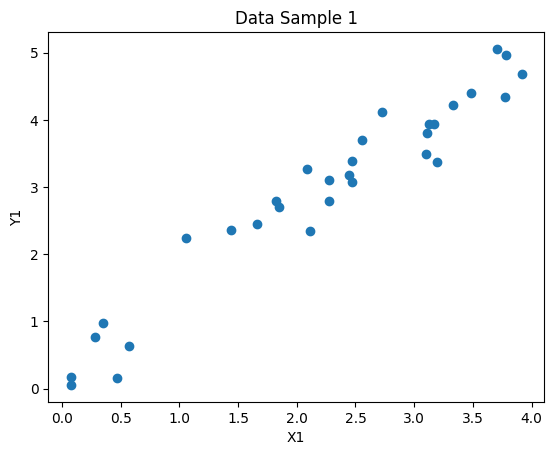

In [81]:
# Load numpy dataset from lab2_task1_sample1.npz
# Hint: use np.load()
loaded_sample1 = np.load("lab2_task1_sample1.npz")

# Create train and test datasets
# Data was saved in a dictionary-liked form, where the keys are ('arr_0','arr_1')
# Load the values into correct variables according to the following mapping.
# (X1 <-- arr_0, Y1 <-- arr_1)
X1 =loaded_sample1["arr_0"]
Y1 = loaded_sample1["arr_1"]

# select correct range for X1 and Y1 and reshape the new array to be proper for linear regression() function
X1 = X1[10:41].reshape(1,-1)
Y1 = Y1[10:41].reshape(1,-1)

plt.scatter(X1,Y1)
plt.title("Data Sample 1")
plt.xlabel("X1")
plt.ylabel("Y1")
plt.show()

**(b) Now find parameters of the regression line with the given samples and your linear regression function.**

In [82]:
## Find the slope and intercept of the regression line using your linear regression function on X1 and Y1
w1, b1 = linear_regression(X1,Y1)
print(w1, b1)

[1.17310565] [0.3183393]


**(c) Now let's try it on a different set of samples.**

Load the new samples, select the correct range according to the quiz and visualise them.

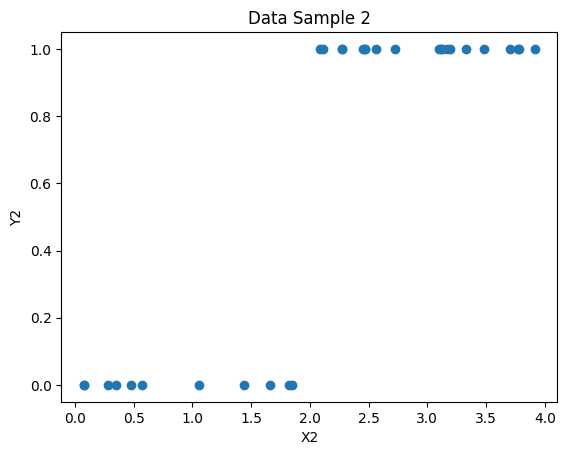

In [83]:
# Load numpy dataset from lab2_task1_sample2.npz
# Hit: use np.load()
loaded_sample2 = np.load("lab2_task1_sample2.npz")

# Create train and test datasets
# Data was saved in a dictionary-liked form, where the keys are ('arr_0','arr_1')
# Load the values into correct variables according to the following mapping.
# (X2 <-- arr_0, Y2 <-- arr_1)
X2 = loaded_sample2["arr_0"]
Y2 = loaded_sample2["arr_1"]

# select correct range for X1 and Y1 and reshape the new array to be proper for linear regression() function
X2 = X2[10:41].reshape(1,-1)
Y2 = Y2[10:41].reshape(1,-1)

# Show samples as a scatter plot
plt.scatter(X2,Y2)
plt.title("Data Sample 2")
plt.xlabel("X2")
plt.ylabel("Y2")
plt.show()

Then find the parameters of the regression line with the new samples and your linear regression function.

In [84]:
## Find the slope and intercept of the regression line using your linear regression function
w2, b2 = linear_regression(X2,Y2)
print(w2, b2)

[0.34831578] [-0.12741893]


<div class="alert alert-block alert-success">

#### Reflection

Follow the instrctions below to make some plots that will aid you to answer the quiz question.

Now use your experience with numpy and matplotlib from the previous lab to make two plots:
- **Plot one**: plot the data points of (X1, Y1) and the regression line from this dataset
- **Plot two**: plot the data points of (X2, Y2) and the regression line from this dataset

Visualise the regression line in the domain **$x \in [0, 4]$.**

To make the plots clearer, you can try to:
- Visualise the regression line as a **line plot in <font color='red'>red</font> colour**.
- Visualise the samples as a **scatter plot in <font color='blue'>blue</font> colour**.

Please plot both the datapoints and the line into the same figure! </br>
Use **50 data points** on the line to make it smooth, and make sure to add an appropriate **plot title** and to **label the axes**!</br>

_Hint_: Check the matplotlib document for details how to do this. You can find many examples there for a variety of different applications. (Check the lab instructions .pdf to see an example of what is expected here.)

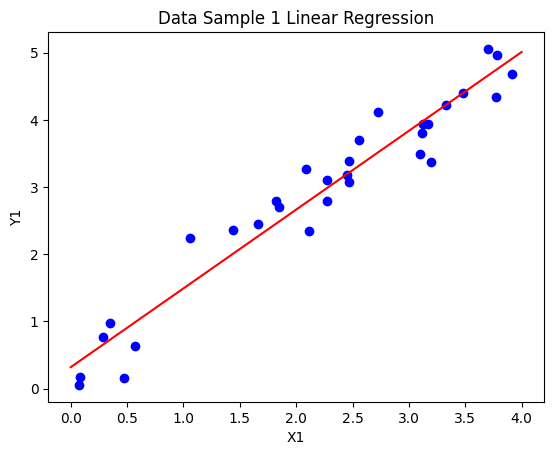

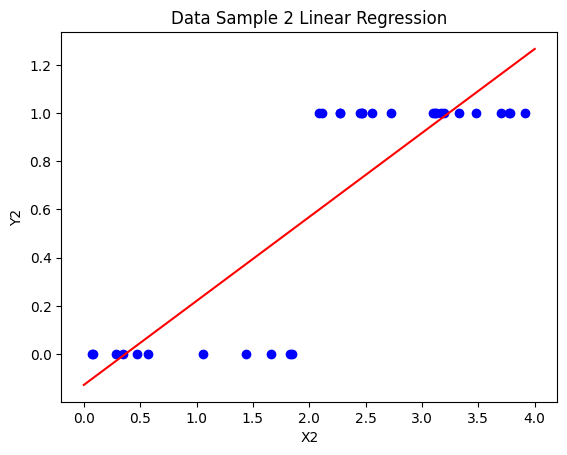

In [85]:
## Viuslise the regression line with given samples X1 and Y1 (both on the same plot)
plt.scatter(X1,Y1, color='b')
plt.plot(np.linspace(0,4,50),w1*np.linspace(0,4,50) + b1, color='r')
plt.title("Data Sample 1 Linear Regression")
plt.xlabel("X1")
plt.ylabel("Y1")
plt.show()

plt.scatter(X2,Y2, color='b')
plt.plot(np.linspace(0,4,50),w2*np.linspace(0,4,50) + b2, color='r')
plt.title("Data Sample 2 Linear Regression")
plt.xlabel("X2")
plt.ylabel("Y2")
plt.show()

<div class="alert alert-block alert-info">
    
# Task 2 - Logistic Regression and Gradient Descent <a class="anchor" id="logistic-gd"></a>

In this section, you will be writing the first parts of your code that is essential to predict the outcome of a logistic regression problem. </br>
In detail, you are going to

- 2.1 Implement and visualise the **sigmoid function**
- 2.2 Write code to **predict the outcome** of a classification problem using a pre-trained logistic regression model
- 2.3 Train a model via Gradient Descent
- 2.4 Evaluate the trained model

<div class="alert alert-block alert-info">
    
## Learning Objective 

This task aims to equip you with the knowledge and practical skills required to implement logistic regression, understand gradient descent as an optimization technique, and evaluate the performance of their trained logistic regression model on training and test datasets. By the end of this lab task, you will be able to:
1. Implement and visualize the sigmoid function to map regression outputs into a range from 0 to 1, necessary for logistic regression.
2. Use the sigmoid function to predict the class probabilities of a classification problem using logistic regression with a pre-trained model.
3. Write code to perform gradient descent, compute gradients, and the cost of the logistic regression model to train it on given training data.
4. Train their own logistic regression model using gradient descent with a fixed number of iterations.
5. Evaluate the trained logistic regression model on previously unseen test data points.
6. Convert class probabilities to actual predicted labels and calculate the accuracy of the model for both training and test data.

<div class="alert alert-block alert-info">

## 2.1  The sigmoid function <a class="anchor" id="sigmoid"></a>

The '_sigmoid function_' $\sigma$, sometimes also called '_logistic function_', is a mathematical function that shows a characteristic "S"-shaped curve as you've seen during the lecture (hence its name!). We commonly use this function in our logistic regression to map the regression outputs to a range from 0 to 1. </br>

### Computing the sigmoid

**(a) Implement the function and calculate values.**

In this task, you are now first asked to write a function that computes the output of the sigmoid function $\sigma(\boldsymbol{x})$ for any input value $\boldsymbol{x}$. </br>

_Hint:_ Use the _numpy_ library you have been introduced to in the previous lab to allow easy computation of multi-dimensional input values as well.

In [86]:
# Implement the sigmoid function
def sigmoid(x):
    return 1/(1+np.exp(-x))

**(b) How to get both the following test cases to get True**

In [87]:
sigmoid(-np.inf) == 0

sigmoid(np.inf) == 1.0

#print(sigmoid(-3.1))

True

**(c) Adjust range and Visualize the function**

According to the c1 and c2 values in the Quiz question, adjust the output range of the sigmoid function.

In [88]:
c1 = 2
c2 = -3

# check the sigmoid range
print(c1*sigmoid(-100) + c2)

-3.0




Then now use your experience with numpy and matplotlib from the previous lab to visualise the output range of our **adjusted** sigmoid function for a 1 dimensional case in the domain $x \in [-10, 10]$. </br>

In detail, we ask you to:
- Visualise the outputs of  f(x) =  c1 sigmoid(x) + c2  as a **line plot in <font color='blue'>blue</font> colour**.
- Visualise the outputs of  f(x) =  c1 sigmoid(x) + c2  as a **scatter plot in <font color='red'>red</font> colour**.

Please plot both into the same figure! </br>

Use **50 data points** to get a smooth plot, and make sure to add an appropriate **plot title** and to **label the axes**!</br>

Please add your name and Student ID to the title of the plot.

_Hint_: Check the matplotlib docu for details how to do this. You can find many examples there for a variety of different applications. (Check the lab instructions .pdf to see an example of what is expected here.)

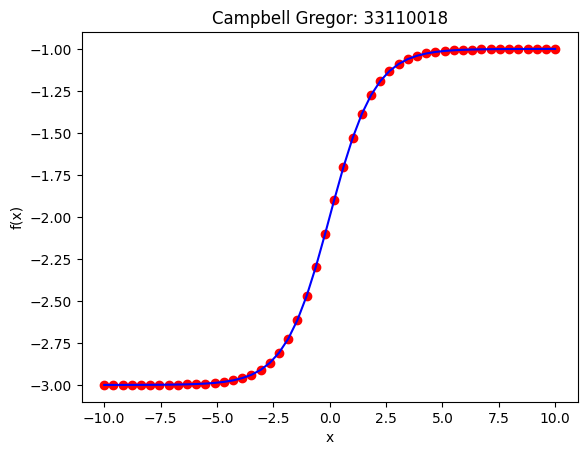

In [89]:
## Visualise the adjusted output 
X3 = np.linspace(-10,10,50)
Y3 = c1*sigmoid(X3) + c2

plt.scatter(X3,Y3, color='r')
plt.plot(X3,Y3, color='b')
plt.title("Campbell Gregor: 33110018")
plt.xlabel("x")
# idk how to get sigma in ASCII
plt.ylabel("f(x)")
plt.show()

Then now use your experience with numpy and matplotlib from the previous lab to visualise the output range of our **adjusted** sigmoid function for a 1 dimensional case in the domain $x \in [-10, 10]$. </br>

In detail, we ask you to:
- Visualise the outputs of the sigmoid as a **line plot in <font color='blue'>blue</font> colour**.
- Visualise the outputs of the sigmoid as a **scatter plot in <font color='red'>red</font> colour**.

Please plot both into the same figure! </br>

Use **50 data points** to get a smooth plot, and make sure to add an appropriate **plot title** and to **label the axes**!</br>

Please add your name and Student ID to the title of the plot.

_Hint_: Check the matplotlib document for details how to do this. You can find many examples there for a variety of different applications. (Check the lab instructions .pdf to see an example of what is expected here.)

<div class="alert alert-block alert-info">

Make sure the graph is something like the one below. Otherwise an incorrect sigmoid function will effect your results later on.

![sigmoid](./figs/sigmoid.png)

<div class="alert alert-block alert-info">

## 2.2 Predicting class probabilities via logistic regression <a class="anchor" id="predict"></a>

You will now use your implemented sigmoid function to solve an actual classification problem using logistic regression. </br>
As discussed in the lecture, a prediction $\hat{y}$ can be obtained by using our logistic regression model via $\hat{y}=\sigma(\boldsymbol{w}^\top \boldsymbol{x})$

Note that for this example, we want to be able to use many samples at the same time - all of which are stored in one single vector $X$, which is similar to the test case $\boldsymbol{x_3}$ from before.

Also note that we predict the distribution over the classes, _i.e._ the probablity for each class -> to get the 'hard' class label, we will later on assign everything below the probablity of 0.5 to class1 and any probability above to class2 (boundary could be included in either).

**(a) Load the dataset, inspect it, and fill the blanks in the Quiz Question**

In [90]:
# Read in the lab2_task2_data.npz using numpy --> data has been saved via np.savez (check docu for more details)

# Components can be accessed like a dictionary after the file has been loaded, and the file contains the following:
# 'X_train' : training data we're going to use
# 'y_train' : labels for the training data
# 'X_test'  : test data we're going to use for evaluation, but NOT for training
# 'y_test'  : labels for the test data
# 'w_pret'  : a set of pretrained weights for the logistic regression model

loaded_data = np.load("lab2_task2_data.npz")

X_train = loaded_data["X_train"].T
y_train = loaded_data["y_train"].T
X_test = loaded_data["X_test"].T
y_test = loaded_data["y_test"].T
w_pret = loaded_data["w_pret"]
## Check the shape of the data!
# Note that we assume certain shapes of data for the basic logistic regression formulas to work,
# so make sure you understand which elements should be multiplied with each other!
# Hint: In case the data is stored in a different shape, you can easily transpose the matrices!
print(X_train.shape)
#print(X_train[1][0])
#print(X_train)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(w_pret.shape)
print(w_pret)


(2, 600)
(1, 600)
(2, 200)
(1, 200)
(2, 1)
[[ 0.28885054]
 [-0.89583847]]


**(b) Add side by side plots here to visualise your train and test data (Use subplots).**

Here you need to visulize the second input variable w.r.t the first one and then color the points by their label.

You may find **scatter plot** suitable, and your plots should be something like this one given below (points are random here):

![rand_data](./figs/rand_data.png)

**Reminder**: Please add axes labels, and have your name and ID in the title of the plot.

Text(0.5, 0.98, 'Campbell 33110018')

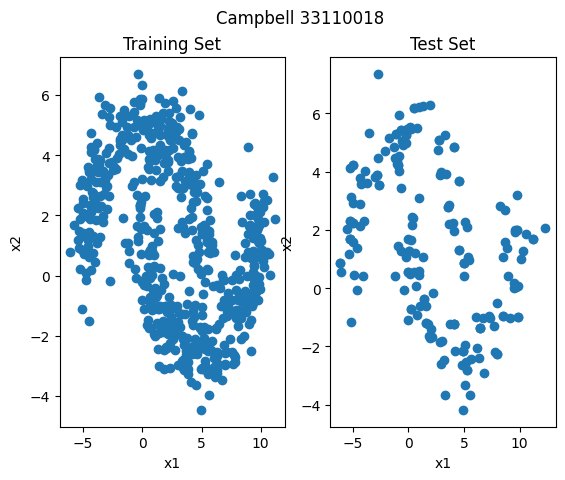

In [91]:
# Add side by side plots here to visualise your train and test data (Use subplots).
# These are the two classes that you will be classifying.

fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.scatter(X_train[0],X_train[1])  #Plot train set
ax1.set_title("Training Set")      #Set proper title 
ax1.set_xlabel("x1")     #Set axis labels
ax1.set_ylabel("x2")


ax2.scatter(X_test[0],X_test[1])  #Plot test set
ax2.set_title("Test Set")     #Set proper title 
ax2.set_xlabel("x1")     #Set axis labels
ax2.set_ylabel("x2")

fig.suptitle("Campbell 33110018")



**(c) Implement a logistic regression model**

You are now going to
- Implement a function to predict outcomes using a logistic regression model (taking in data $\boldsymbol{X}$ and parameters $\boldsymbol{w}$)
- Please note that the parameters $\boldsymbol{w}$ of shape $(\# input \, features , 1) $ and  $\boldsymbol{X}$ of size $(\# samples, \# input \, features)$  are passed as input arguments to your function and it should provide $\hat{y}$ (the probability) of size $(\# samples, 1)$ in the output.

In [92]:
# Write a prediction function -> We predict the output class probability, NOT the class label (no 0,1 rounding)

def predict(w, X):

    # Input argument(s):
    # X - the input data
    # w - the weights from the trained model
     
    # Output:
    # Probability prediction of each data point (y_hat)

    # pass input data to x
    x = X

    # Perform Matrix multiplication between the inputs and the weights
    z = np.matmul(,X)

    # probability
    y_hat = sigmoid(z)

    return y_hat 

**(d) Test your prediction function using the toy data set given in the quiz**

You can find the datapoints in the Quiz Question

Note define the toy data [number of samples, dim].

We also want the same to be true for our predictions, _i.e._ return them in the shape of [number of samples, 1] to match the input data.

In [93]:
## Define the toy input data

X_toy = [0.9, -0.2], [-0.3, 0.1], [-0.8, 0.7], [0.3, -0.1] 

## Obtain predictions using predict function and pretrained parameters w_pret
y_hat_toy = predict(X_toy,w_pret)

print(f'y_hat_toy_sum: {np.sum(y_hat_toy):.2f}')

y_hat_toy_sum: 1.91


<div class="alert alert-block alert-info">

## 2.3 Training a model via Gradient Descent <a class="anchor" id="train"></a>
    
In this task, you will be writing code for the essential components to **train your own logistic model via Gradient Descent** given some training data. </br>
In detail, you are going to
- Implement a function that computes and returns **gradient and cost** of the logistic regression
- Write code to perform the actual **gradient descent algorithm** for a fixed number of iterations and **train your own logistic regression model** given some training data
- **Evaluate your model** on previously unseen test data points


As discussed in more detail during the lecture, we commonly use the so-called _Cross Entropy_ Loss to calculate the cost of our logistic regression problem. This loss function can be defined as </br>
</br>
\begin{equation}
    \mathcal{L}_{\mathrm{CE}}(\boldsymbol{w})= - \frac{1}{m}\sum_{i=1}^{m} \Big\lbrace y_i \log \Big(\underbrace{\sigma\left(\boldsymbol{w}^\top \boldsymbol{x}_i\right)}_{\hat{y}_i}\Big) + \left( 1 - y_i \right) \log \Big( 1- \underbrace{\sigma\left(\boldsymbol{w}^\top \boldsymbol{x}_i\right)}_{\hat{y}_i}\Big) \Big\rbrace
\end{equation}
</br>
In this notation, $\sigma(z) = 1 / (1 + \exp(-z))$ denotes the **sigmoid** function, and $(\boldsymbol{x}_1,y_1),(\boldsymbol{x}_2,y_2),\dots,(\boldsymbol{x}_m,y_m)$ with $\boldsymbol{x}_i \in \mathbb{R}^n, y_i \in \lbrace 0, 1\rbrace$ represent the $m$ training samples (with labels $y_i$). </br>
The gradient of the cross entropy loss w.r.t. the weights $\boldsymbol{w}$ can be written as
</br>

\begin{equation}
    \nabla_{\boldsymbol{w}}\mathcal{L}_{\mathrm{CE}} = \frac{1}{m}\sum_{i=1}^{m} \Big(\underbrace{\sigma\left(\boldsymbol{w}^\top \boldsymbol{x}_i\right)}_{\hat{y}_i} - y_i \Big) \boldsymbol{x}_i
\end{equation}
</br>

###  Gradient and Cost Computation

**(a) Implemnt the function**

In this part, we want to define a function that is able to compute our cross-entropy loss $\mathcal{L}_{\mathrm{CE}}$, as well as the gradient $\nabla_{\boldsymbol{w}}\mathcal{L}_{\mathrm{CE}}$ of our loss $\mathcal{L}_{\mathrm{CE}}$ _w.r.t._ the parameters $\boldsymbol{w}$, we want $\nabla_{\boldsymbol{w}}\mathcal{L}_{\mathrm{CE}}$ to be return of shape $(1,\# parameters)$. 

As you can see above, all we need to compute the gradient vector is the prediction of the model $\hat{y}$ and the actual labels $y$, as well as the input data points $\boldsymbol{X}$. The loss itself is even more simple and only requires the predictions $\hat{y}$ and true labels $y$.

In the following function for the simplicity try to code $a$ and $b$, then create $\mathcal{L}_{\mathrm{CE}}$ loss out of them.
</br>
\begin{equation}
    \mathcal{L}_{\mathrm{CE}}(\boldsymbol{w})= - \frac{1}{m}\sum_{i=1}^{m} \Big\lbrace \underbrace{ y_i \log \Big(\underbrace{\sigma\left(\boldsymbol{w}^\top \boldsymbol{x}_i\right)}_{\hat{y}_i}\Big)}_{a} + \underbrace{\left( 1 - y_i \right) \log \Big( 1- \underbrace{\sigma\left(\boldsymbol{w}^\top \boldsymbol{x}_i\right)}_{\hat{y}_i}\Big)}_{b} \Big\rbrace
\end{equation}
</br>

In [94]:
def compute_loss_and_grad(X, y, y_hat):
    # Inputs:
    #    X - Set of samples (each sample is a row in X),
    #    y - Corresponding ground-truth labels
    #    y_hat - Predicted class probabilities
    
    # Wierd input format
    y = np.array(y).flatten()
   
    # log(0) might throw error, so handled via small eps 
    eps = 1e-12

    # Compute the mean cross-entropy loss w.r.t. the parameters w (mean as defined in lecture)
    a = y*np.log(eps+y_hat)
    b = (1-y) * np.log(eps+1-y_hat)
    loss = np.mean(-(a + b))

    # Compute the gradient vector (mean over all samples as defined in lecture)
    grad_vec = np.matmul((y_hat-y),X) / len(y)
    

    # Return loss and gradient vector
    return loss, grad_vec, grad_vec.shape

**(b) Apply the function**

Pass the datapoints given in the Quiz Question through the function you just implemented, and printout the loss, gradient and the shape of the gradient vector.

Your **full name** must be printed in the first line before the results.

In [95]:
Student_name = 'Campbell Gregor'
X_toy = [-0.3, -0.15], [0.89, -0.02], [-0.35, 0.01], [0.26, -0.64] 
y_toy = [1], [0], [1], [0]
y_hat_toy = predict(X_toy,w_pret).T


loss, grad_vec, grad_vec_shape = compute_loss_and_grad(X_toy, y_toy, y_hat_toy)

# Also print your name or ID here
print(f'Student : {Student_name}')
print(f'Loss : {loss}')
print(f'grad_vec : {grad_vec}')
print(f'grad_vec_shape : {grad_vec_shape}')


Student : Campbell Gregor
Loss : 0.8320890795764224
grad_vec : [[ 0.2518941  -0.09092294]]
grad_vec_shape : (1, 2)


**(c) Training with Gradient Descent**

Gradient descent, sometimes also referred to as _steepest descent_, is a popular first-order iterative optimisation method that has become ubiquitous in the machine and deep learning context. As you have heard in the lecture, the idea is to find the local minimum of a differentiable function by repeatedly taking steps in the opposite direction of the gradient of the function at the current point - i.e. in the direction of its steepest descent.

In this section of the lab, you are going to implement the **Gradient Descent algorithm** as a function that we can use afterwards to train our logistic regression model!

The main parts of the algorithm work as follows:
- Initialise hyperparameters like step-size aka learning rate, and number of iterations
- Randomly initialise the set of parameters $\boldsymbol{w}_{init}$ that shall be optimised
- For a certain number of iterations, do:
    - Obtain the prediction using the current weights $\boldsymbol{w}_i$ and training data $\boldsymbol{X}_{train}$
    - Compute the loss $\mathcal{L}_{\mathrm{CE}}$ and the gradient vector $\nabla_{\boldsymbol{w}}\mathcal{L}_{\mathrm{CE}}$ w.r.t. the current parameters $\boldsymbol{w}_i$
    - Update the parameters using the gradient vector and learning rate _lr_
- After all iterations are finished, return the final optimised set of parameters

In addition, we ask you to also:
- Return a list of all losses (one value for each iteration)
- Return a list of all gradient vectors (one vector for each iteration)
- Implement an option via the argument "logging" to switch on printing a string containing the 'iteration' and the 'loss' for each iteration



**Very Important:**
Note that the inputs to this function are:
- initial set of parameters $\boldsymbol{w}_{init}$ of shape $(\# input \, features, 1) $
- the hyperparameters #epochs and learning rate
- the training data $\boldsymbol{X}_{train}$ of shape $(\# samples, \# input \, features)$ 
- the corresponding labels $\boldsymbol{y}_{train}$ of shape $(\# samples, 1)$ 

and the outputs should be 
- a list of all losses 
- a list of all gradient vetors and each gradient vector must be of shape $(1, \# input \, features) $
- the final weight $\boldsymbol{w}^{*}$ of shape $(\# input \, features, 1) $ 

In [96]:
## Setting some hyperparameters:
lr = 0.5         # Learning rate
num_epochs = 20    # Number of iterations

In [97]:
def gradient_descent(w_init, num_epochs, lr, X_train, y_train, logging=False):
    ## Create empty lists to store the values for loss and gradient vector over all
    #  'num_epochs' iterations of our gradient descent optimisation procedure
    losses = []
    grad_vecs = []

    # Init the parameters
    w = w_init

    ## Implement the actual gradient descent using the previously implemented functions
    for ep in range(num_epochs):
        # Compute prediction using current weights
        preds =  predict(X_train, w).T
        loss, grad_vec, grad_vec_shape = compute_loss_and_grad(X_train, y_train, preds) 
        w = w - lr*grad_vec.T

        losses.append(loss)
        grad_vecs.append(grad_vec)

        if logging:
            print(f'Ep {ep+1:2d} | Loss: {loss:.3f}')

    return w, losses, grad_vecs

**(d) Now training time!**

Use the initial weights given in the Quiz Question, and run the gradient descent algorithm for 20 epochs.

In [98]:
## Run the function on the training set
## Start from given initial weight in teh quiz
w_init =  np.array([[-5],[10]]) # shape (2,1)

# Obtain the final weights via gradient descent
w_final, losses, grad_vecs = gradient_descent(w_init, num_epochs, lr, X_train.T, y_train)
print(w_final)

[[ 0.27737065]
 [-0.81615791]]


**(e) Create a new function as gradient_descent_ver2() that takes same input**
- and provides same output plus:
- a list of all values for the first (i.e. $w_1$) and second (i.e. $w_2$) parameters $w = [w_1 \, w_2]^T$.

Apply this function and start from given $w_{init}$ in Task 2.3 (d) of the quiz and visualize how these parameters converge w.r.t the epochs. (Two plots for two parameters)

Then add the loss convergence.


Reminder: You should have three plots in one column showing the convergence of $w_1$, $w_2$, and  $\mathcal{L}_{\mathrm{CE}}$ w.r.t. epochs. Please add your name and Student ID to the title of at least one plot.

In [99]:
def gradient_descent_ver2(w_init, num_epochs, lr, X_train, y_train, logging=False):
    
    ## Create empty lists to store the values for loss and gradient vector over all
    #  'num_epochs' iterations of our gradient descent optimisation procedure
    losses = []
    grad_vecs = []
    w_1_values = []
    w_2_values = []

    # Init the parameters
    w = w_init

    ## Implement the actual gradient descent using the previously implemented functions
    for ep in range(num_epochs):
        # Compute prediction using current weights
        preds =  predict(X_train, w).T
        loss, grad_vec, grad_vec_shape = compute_loss_and_grad(X_train, y_train, preds) 
        w = w - lr*grad_vec.T

        losses.append(loss)
        grad_vecs.append(grad_vec)
        w_1_values.append(w[0])
        w_2_values.append(w[1])

        if logging:
            print(f'Ep {ep+1:2d} | Loss: {loss:.3f}')

    return w, losses, grad_vecs, w_1_values, w_2_values

Text(0.5, 0.98, 'Campbell 33110018')

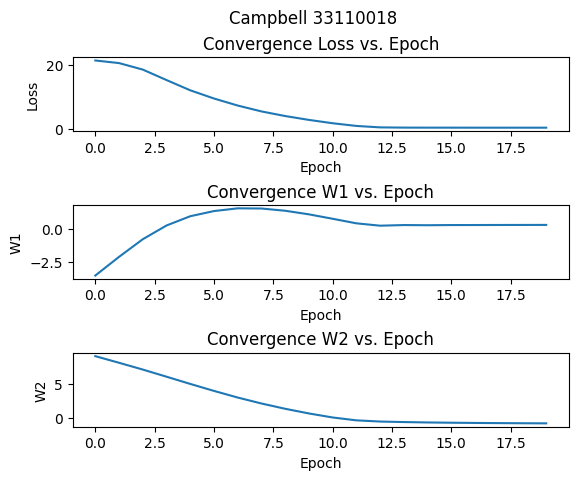

In [100]:
## Run the function on the training set

## Start from given initial weight in teh quiz
w_init = np.array([[-5],[10]]) # shape (2,1)
w_pret2, losses, grad_vesc2 , w_1_values, w_2_values= gradient_descent_ver2(w_init, num_epochs, lr, X_train.T, y_train)

fig, (ax1, ax2, ax3) = plt.subplots(3, 1)
epochs = range(num_epochs)

ax1.plot(epochs,losses)
ax1.set_title("Convergence Loss vs. Epoch")      #Set proper title 
ax1.set_xlabel("Epoch")     #Set axis labels
ax1.set_ylabel("Loss")

ax2.plot(epochs,w_1_values)
ax2.set_title("Convergence W1 vs. Epoch")      #Set proper title 
ax2.set_xlabel("Epoch")     #Set axis labels
ax2.set_ylabel("W1")

ax3.plot(epochs,w_2_values)
ax3.set_title("Convergence W2 vs. Epoch")      #Set proper title 
ax3.set_xlabel("Epoch")     #Set axis labels
ax3.set_ylabel("W2")

plt.subplots_adjust(wspace=0.5, hspace=1)
fig.suptitle("Campbell 33110018")

<div class="alert alert-block alert-info">

## 2.4 Evaluating the trained model <a class="anchor" id="evaluate"></a>

After you have obtained your optimised set of parameters $\boldsymbol{w}^{*}$, let's see how your model performs! </br>

**(a) To this end, you are going to do the following**

- Obtain the predictions (class probabilities) $\hat{y}_{train}$ for the training data $\boldsymbol{X}_{train}$ using $\boldsymbol{w}^{*}$
- Obtain the predictions (class probabilities) $\hat{y}_{test}$ for the test data $\boldsymbol{X}_{test}$ using $\boldsymbol{w}^{*}$
- Convert these into the actual predicted labels (everything with probability >=0.5 is more likely to be of class 1 and thus gets label '1' assigned ; below gets label '0')
- Count how many samples have been correctly classified and compute the percentage (_i.e._, the accuracy in %)
- Report your obtained accuracies for both training and test data

In [101]:
## Evaluate the obtained model on previously unseen test data

# Obtain predicted class probabilities for test data
y_hat_test  = predict(X_test.T, w_final)


# Obtain class labels
c_hat_test =  np.where(y_hat_test>=0.5,1,0)
print(c_hat_test.shape)
print(y_test.shape)

# Evaluate the classification accuracy
acc_test = np.sum(c_hat_test == y_test[0])/len(y_test[0])

print(acc_test)
#0.845


(200, 1)
(1, 200)
99.64


**(b) Print out train and test accuracy if you start training from the given initial weight in the quiz Task 2.4(b)**

- You should repeat gradient decsent starting from the $w_{init}$ and obtain $w^{*}$
- Then calculate the accuracy on test and train set for the model with weights $w^{*}$
- print the accuracy for both train and test set.

In [102]:
## Repeat training model from given initial weight in the quiz
w_init = np.array([[5],[5]])
w_final2, losses, grad_vesc2 = gradient_descent(w_init, num_epochs, lr, X_train.T, y_train)

print(len(w_final2))

# Obtain predicted class probabilities for train and test data
y_hat_test2 = predict(X_test.T,w_final2)

# Obtain actual class labels for training and test data
c_hat_test2 = np.where(y_hat_test2>=0.5,1,0)



# Evaluate the classification accuracy for training and test data
acc_train = np.sum(c_hat_test == y_train[0])/len(y_train[0])

acc_test = np.sum(c_hat_test == y_test[0])/len(y_test[0])



# Print outputs
print(f'Training accuracy: {acc_train:.3f}')
print(f'Test accuracy: {acc_test:.3f}')

2
Training accuracy: 99.520
Test accuracy: 99.640


<div class="alert alert-block alert-success">

#### Reflection

Based on the Code tasks you have done, select the incorrect statement from the given list in the quiz.



<div class="alert alert-block alert-info">

# Task 3 - Analysing convergence and accuracy <a class="anchor" id="analyse-convergence-and-accuracy"></a>
    
In this section, your task involves examining logistic regression models using various hyper-parameter configurations and assessing their convergence behavior.  </br>
In detail, you are going to

## Improving the accuracy <a class="anchor" id="improve-accuracy"></a>
Our previous choice of hyperparameters might not be the best possible one (or even close to it). </br>
Can you achieve a **better test accuracy** by changing the hyperparameters from the previous task? </br>
Try to improve upon the standard choice by varying the learning rate `lr`. At the meantime, we are going to take a closer look at how gradient descent 'progresses' for different choices of learning rate. Report your choice and best results below!

Given the provided set of learning rates _lrs_, run your implemented gradient descent method and plot the obtained loss values over the number of iterations for each learning rate.  </br>
Additionally save the training and test accuracies achieved for each learning rate. </br>
You can re-use/copy-and-paste your code from above, or define it as a function!

<div class="alert alert-block alert-info">
    
## Learning Objective 
The aim of this task is to enhance learners' ability to fine-tune hyperparameters for logistic regression models, interpret convergence trends, and make informed decisions about model accuracy and potential overfitting on the dataset. By the end of this lab task, the you will be able to:
1. Analyze and compare the test accuracy of the logistic regression model with different hyperparameter settings.
2. Evaluate the training convergence of the logistic regression model during the training process and identify any general trends in the convergence behavior.
3. Assess whether the model shows signs of overfitting on the given dataset by analyzing the training vs. test accuracy.
4. Describe their observations regarding the relationship between the choice of learning rates, convergence results, and accuracy on the training and test data.

**(a) Try different learning rates**

- A list of learning rates are given in the quiz
- The number of training epochs is also given.
- You should repeat training the model for all learning rates given in the list (hint: use a $for$ loop)
- The initial weight is fixed for all the training scenarios  $w_{init} = [-2 \quad 2]^T$
- Then visualize the lossed of each training w.r.t. epochs for all given learning rates in the list in one graph. 
- Each loss plot must have a legend of corresponding learning rate. 
- Please add your name and Student ID to the title of the plot.

In [103]:
## Provided list of learning rates to train on:
lrs = [0.05, 0.1, 0.5, 2]
# Max number of iterations for GD algorithm to run
num_epochs = 30

Text(0.5, 0.98, 'Campbell 33110018')

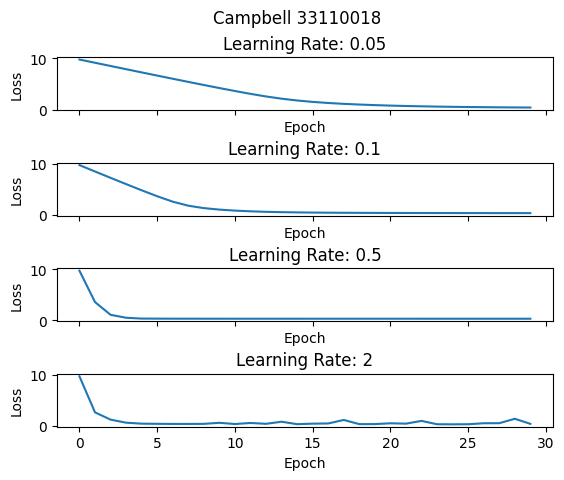

In [104]:
# ================================================
# Fix the initial point
w_init = np.array([[-2] , [2]])
# ================================================
epochs = range(num_epochs)
## Run gradient descent for all learning rates, and plot results
fig, axes = plt.subplots(len(lrs), 1, sharex=True)  # Create subplots
for i, lr in enumerate(lrs):
    w, losses, grad_vesc = gradient_descent(w_init, num_epochs, lr, X_train.T, y_train)
    axes[i].plot(epochs, losses)
    axes[i].set_xlabel("Epoch")     #Set axis labels
    axes[i].set_ylabel("Loss")
    axes[i].set_title(f"Learning Rate: {lr}")

plt.subplots_adjust(wspace=1, hspace=1)
fig.suptitle("Campbell 33110018")

**(b) Fill the blanks in the Quiz Question, based on your analysis**

**(c) Write evaluate() function that takes input $X$, output $y$, and the final weight $w^*$ and calculates accuracy.**

- A list of learning rates is given in the quiz.
- Repeat training the model by all the given learning rates (hit: use a $for$ loop)
- Record the final weight $w^*$ for all traning scenarios.
- Then apply the evaluate() function to camculate the accuracy of different models you have trained by given learning rates.
- Print the test and train accuracy next to the corresponding learning rate. 
- Print your name and ID in the first line of the output.  



In [105]:

## Provided list of learning rates to train on:
lrs = [0.05, 0.1, 0.5, 2]
# Max number of iterations for GD algorithm to run
num_epochs = 30

In [106]:
# ================================================
# Fix the initial point
w_init = np.array([[-2] , [2]])
# ================================================

## Run gradient descent for all learning rates, and keep the w_finals
w_finals = []
for i, lr in enumerate(lrs):
    w, losses, grad_vesc = gradient_descent(w_init, num_epochs, lr, X_train.T, y_train)
    w_finals.append(w)

#print(w_finals)


In [107]:
# Evaluating the stored parameter sets to retrieve train and test accuracies
def evaluate(X,y,w):
    # Obtain predicted class probabilities
   y_hat = predict(X.T,w)

    # Obtain actual class labels (everything >=0.5 is class1, rest class0)
   c_hat = np.where(y_hat>=0.5,1,0)
    # Evaluate the classification accuracy for training and test data
   s = len(c_hat)
   acc = np.sum(c_hat == y[0])/s
   return acc

best = np.array([])

print("Student :  Campbell, ID: 33110018")
print(' >>> Training accuracies for different learning rates: <<<')
for i, w in enumerate(w_finals):
   acc = evaluate(X_train,y_train[0],w)
   best = np.append(best,acc)
   print(f"lr={lrs[i]}\t {acc:.3f}")

print('\n >>> Test accuracies for different learning rates: <<<')
for i,w in enumerate(w_finals):
   acc = evaluate(X_test,y_test[0],w)
   best[i] += acc
   print(f"lr={lrs[i]}\t {acc:.3f}")

best_i = np.argmax(best)

print(f"Model trained by {lrs[best_i]} is the best model")

Student :  Campbell, ID: 33110018
 >>> Training accuracies for different learning rates: <<<
lr=0.05	 0.600
lr=0.1	 0.527
lr=0.5	 0.520
lr=2	 0.410

 >>> Test accuracies for different learning rates: <<<
lr=0.05	 0.515
lr=0.1	 0.450
lr=0.5	 0.435
lr=2	 0.330
Model trained by 0.05 is the best model


<div class="alert alert-block alert-danger">

# <p style="text-align: center;">The End</p>